# CMSE 202 Final Exam (Sect. 001 -- Spring 2023)

### <p style="text-align: right;"> &#9989; Trevor Locknane</p>
### <p style="text-align: right;"> &#9989; locknane</p>

---
The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.


While the exam will be *open* for 8 hours, **you should only take two hours on the exam.** The exam was written to take two hours. We'll be going on the honor system for this. There are times when instructors will be available to answer questions. 

If you cannot complete the code or your cells do not run, just provide your code **as complete as possible**.


### Content Knowledge Tested
- Using Github to save and track progress on your work
- Effectively visualizing data
- Using ML tools to create a classification model
- Quantitatively evaluating classification models

---
## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, Trevor Locknane, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam is an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

**Record the time you start here in the next cell:**

10:17am

---
## Part 1: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### Part 1.1 (4 Points)

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `final` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

---
## Part 2 (10 Points)

For this exam, you’ll be working with a data set that contains measurements of the physical characteristics of three penguin species (e.g., culmen legnth, culmen depth, flipper length, and body mass). This data set is modified from the one associated with a research article (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081). We’ll ask you a set of questions that center the classification of these penguins using techniques you’ve worked with in class and on the homework. 

<img src="
https://pbs.twimg.com/media/EaAWkZ0U4AA1CQf?format=jpg&name=4096x4096" border="0" align="center" width="800">

<img src="https://pbs.twimg.com/media/EaAXQn8U4AAoKUj?format=jpg&name=4096x4096" border="0" align="center" width="400">
images found online.

To get started, let’s grab the dataset we’ll be working with.

**(2 pt) Use the following URL to download the dataset.**

`https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/data/Penguin_data.csv`

In [1]:
## your code
#curl -o https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/data/Penguin_data.csv


**(3 pt) Import the dataset in the cell below.** Examine the data and see what features are in the data.

In [2]:
## your code
import pandas as pd
penguin_df = pd.read_csv('Penguin_data.csv', error_bad_lines = False)
penguin_df.head()

,studyName,SampleNumber,Species,Region,Island,Individual_ID,ClutchCompletion,DateEgg,CulmenLength(mm),CulmenDepth(mm),FlipperLength(mm),BodyMass(g),Sex
0,PAL0708,1,Gentoo,Anvers,Biscoe,N31A1,Yes,2007-11-27,46.1,13.2,211,4500,FEMALE
1,PAL0708,2,Gentoo,Anvers,Biscoe,N31A2,Yes,2007-11-27,50.0,16.3,230,5700,MALE
2,PAL0708,3,Gentoo,Anvers,Biscoe,N32A1,Yes,2007-11-27,48.7,14.1,210,4450,FEMALE
3,PAL0708,4,Gentoo,Anvers,Biscoe,N32A2,Yes,2007-11-27,50.0,15.2,218,5700,MALE
4,PAL0708,5,Gentoo,Anvers,Biscoe,N33A1,Yes,2007-11-18,47.6,14.5,215,5400,MALE


**(5 pt) Now let's extract the useful data for classification.** Create a new data frame that contains only culmen lenth, culmen depth, flipper length, body mass, and species.


In [3]:
## your code 
penguin_refined = penguin_df.loc[:, ['CulmenLength(mm)', 'CulmenDepth(mm)', 'FlipperLength(mm)', 'BodyMass(g)', 'Species']]
penguin_refined.head()

,CulmenLength(mm),CulmenDepth(mm),FlipperLength(mm),BodyMass(g),Species
0,46.1,13.2,211,4500,Gentoo
1,50.0,16.3,230,5700,Gentoo
2,48.7,14.1,210,4450,Gentoo
3,50.0,15.2,218,5700,Gentoo
4,47.6,14.5,215,5400,Gentoo


---
## Part 3 (15 Points)

Use Seaborn to make a visualization showing the distributions (i.e.,scatterplots) of each of the different penguin characteristics. Your visualization should represent each of the different penguin species/classes as a different color. This should all be a single figure. Use the [**examples in the seaborn gallery**](https://seaborn.pydata.org/examples/index.html) to help you find the right type of figure. (Note: There are several types of figures that will work for this.)

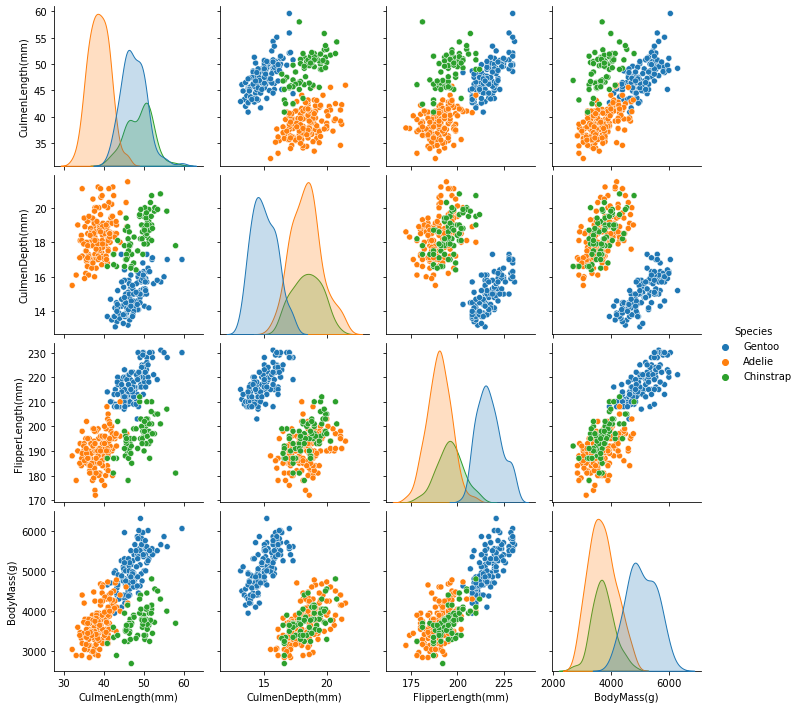

In [14]:
## your code

import seaborn as sns


sns.pairplot(data=penguin_refined, hue='Species')


## Part 4 (10 Points)

Look at the distributions of the data. Without doing any model fitting (i.e., just by eye), which pair of measured characteristics do you think would be **easiest** for an ML technique to differentiate between? Which pair of seeds do you believe would be **hardest** to separate? **Why?** Justify your answers using your visualization.

The measured characteristics that would be easiest to differentiate between using machine learning are Culmen Length and Culmen Depth.  The seeds that would be hardest to separate are Body Mass and Flipper Length.  This is due to the fact that you cant draw a line through that data and separate the three species at all.

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 5 (5 Points)

Split the data into a training and testing set. Pick a reasonable train size. 
Also, for `random_state`, if your birthday is on an odd date of a month, set it to be 35. Otherwise, set it to 42.

In [5]:
## your code




---
## Part 6 (20 Points)

Create and train a SVM model for classifying the data. **Note:** You may get multiple warnings when creating your model (warnings are *pink*). You may also get a warning about a failure to converge. It is fine to ignore these warnings. 

In [6]:
## your code



---
## Part 7 (5 Points)

**Evaluate your model by finding the accuracy, recall, precision, and confusion matrix using the test data.**

In [7]:
## your code


---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---


## Part 8 (7 Points)

I caught a penguin. It has a short (40 mm in length) and mediate-thick (17 mm in depth) bill. Its flippers are short (190 mm). It's kinda skinny, weighing 3000 g, What is its species determined by your classifier?

In [8]:
## your code



write your answer here.

---
## Part 9 (7 Points)

**Let's try to use `LogisticRegression` function in sklearn to classify the same data.** Note that we are **not** using `statsmodels` here. Import logistic regression function from sklearn and build logistic regression model to classify the penguin data.

In [9]:
## your code




---
## Part 10 (3 Points)

**Evaluate your model by finding the accuracy, recall, precision, and confusion matrix using the test data.**

In [10]:
## your code



**Compare to SVM, does Logisitic Regression give better result?**

write your answer here


---
## Part 11 (8 Points)
Reflect on you have learned  in this class. What can we do to improve the accuracy of the classifiers? 

write your answer here

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---
**Record the time you finish here in the next cell.**

## You're done! Congrats on finishing CMSE 202!
Don't forget to also upload this file to D2L drop box.